<a href="https://colab.research.google.com/github/hadisan13/Dicoding/blob/main/Submisi_image_clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import splitfolders
import zipfile,os

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip


--2020-10-08 03:36:16--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.25MB/s    in 38s     

2020-10-08 03:36:55 (8.03 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = "/tmp/rockpaperscissors/rps-cv-images"
output_dir = "/tmp/rockpaperscissors/splitted-data"
splitfolders.ratio(base_dir, output_dir, seed=1337, ratio=(.6, .4), group_prefix=None)

Copying files: 2188 files [00:00, 2984.27 files/s]


In [ ]:
os.listdir(output_dir)

['train', 'val']

In [ ]:
train_dir = os.path.join(output_dir, 'train')
test_dir = os.path.join(output_dir, 'val')

# membuat direktori pada direktori data training
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

test_rock_dir = os.path.join(test_dir, 'rock')
test_paper_dir = os.path.join(test_dir, 'paper')
test_scissors_dir = os.path.join(test_dir, 'scissors')
 


In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    horizontal_flip=True,
                    rotation_range=20,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    fill_mode = 'nearest')
  

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')
 

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=100,
      validation_data=test_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/100
25/25 - 10s - loss: 1.1044 - accuracy: 0.3200 - val_loss: 1.0993 - val_accuracy: 0.3000
Epoch 2/100
25/25 - 10s - loss: 1.0966 - accuracy: 0.3700 - val_loss: 1.0922 - val_accuracy: 0.3000
Epoch 3/100
25/25 - 10s - loss: 1.0836 - accuracy: 0.4200 - val_loss: 1.1127 - val_accuracy: 0.3000
Epoch 4/100
25/25 - 10s - loss: 1.1038 - accuracy: 0.3300 - val_loss: 1.0750 - val_accuracy: 0.5500
Epoch 5/100
25/25 - 10s - loss: 1.0856 - accuracy: 0.4100 - val_loss: 1.0683 - val_accuracy: 0.3500
Epoch 6/100
25/25 - 10s - loss: 1.0901 - accuracy: 0.3300 - val_loss: 1.0674 - val_accuracy: 0.4000
Epoch 7/100
25/25 - 10s - loss: 1.0825 - accuracy: 0.3900 - val_loss: 1.0664 - val_accuracy: 0.4000
Epoch 8/100
25/25 - 10s - loss: 1.0532 - accuracy: 0.5500 - val_loss: 1.0145 - val_accuracy: 0.6500
Epoch 9/100
25/25 - 10s - loss: 1.0498 - accuracy: 0.4300 - val_loss: 1.0427 - val_accuracy: 0.4500
Epoch 10/100
25/25 - 10s - loss: 1.0199 - accuracy: 0.4600 - val_loss: 0.9823 - val_accuracy: 0.5000

Saving testes.PNG to testes.PNG
testes.PNG
Scissors


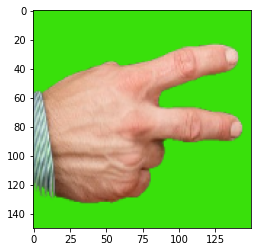

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images)
  
  print(fn)
  if(classes[0,0]):
    print("Paper")

  if(classes[0,1]):
    print("Rock")

  if(classes[0,2]):
    print("Scissors")
  

Muhammad Ihsan Hadi, 
Kota Bandung, Jawa Barat